<a href="https://colab.research.google.com/github/ABDOULAYEDIOP150/Apprentissage-Statistique-/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Exemple de données
A = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]])  # Matrice d'adjacence
k = np.array([2, 1, 1])  # Degrés des nœuds
m = np.sum(A) / 2  # Nombre total d'arêtes
C = np.array([0, 0, 1])  # Communautés associées à chaque nœud (exemple)

# Fonction pour calculer la log-vraisemblance
def log_likelihood(p, A, k, m, C):
    logL = 0
    n = A.shape[0]

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                logL += A[i, j] * np.log(p) + (1 - A[i, j]) * np.log(1 - p)
            else:
                logL += A[i, j] * np.log(2 * m / (k[i] * k[j])) + (1 - A[i, j]) * np.log(1 - (2 * m / (k[i] * k[j])))

    return logL

# Fonction pour calculer la négation de la log-vraisemblance
def negative_log_likelihood(p, A, k, m, C):
    return -log_likelihood(p, A, k, m, C)

# Fonction pour calculer la dérivée de la log-vraisemblance par rapport à p
def gradient_negative_log_likelihood(p, A, C):
    grad = 0
    n = A.shape[0]

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                grad += A[i, j] / p - (1 - A[i, j]) / (1 - p)

    return grad

# Descente de gradient
def gradient_descent(A, k, m, C, p_init=0.5, learning_rate=0.01, max_iter=100):
    p = p_init
    for _ in range(max_iter):
        grad = gradient_negative_log_likelihood(p, A, C)
        p -= learning_rate * grad  # Mise à jour du paramètre p (soustraction car on minimise)

        # Pour éviter que p soit hors des limites [0, 1]
        p = np.clip(p, 1e-10, 1 - 1e-10)

    return p

# Exécution de la descente de gradient
optimal_p = gradient_descent(A, k, m, C)
print(f"Valeur optimale de p: {optimal_p:.4f}")


Valeur optimale de p: 1.0000


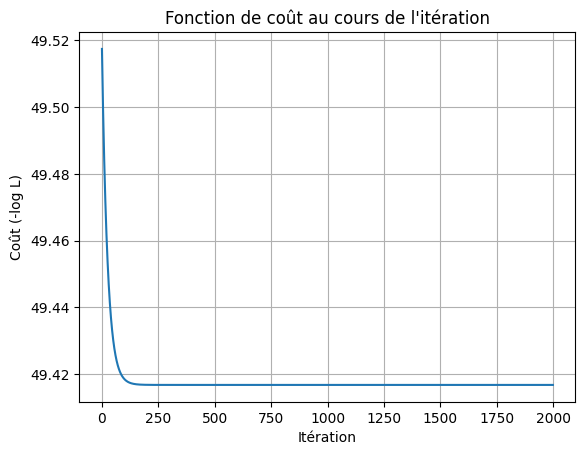

Valeur optimale de p: 0.4000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données
A = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]])  # Matrice d'adjacence
k = np.array([2, 1, 1])  # Degrés des nœuds
m = np.sum(A) / 2  # Nombre total d'arêtes
C = np.array([0, 0, 1])  # Communautés associées à chaque nœud (exemple)

# Fonction pour calculer la log-vraisemblance
def log_likelihood(p, A, k, m, C):
    logL = 0
    n = A.shape[0]

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                logL += A[i, j] * np.log(p) + (1 - A[i, j]) * np.log(1 - p)
            else:
                prob = 2 * m / (k[i] * k[j])
                prob = np.clip(prob, 1e-10, 1 - 1e-10)  # Pour éviter des valeurs extrêmes
                logL += A[i, j] * np.log(prob) + (1 - A[i, j]) * np.log(1 - prob)

    return logL

# Fonction pour calculer la négation de la log-vraisemblance
def negative_log_likelihood(p, A, k, m, C):
    return -log_likelihood(p, A, k, m, C)

# Fonction pour calculer la dérivée de la négative log-vraisemblance par rapport à p
def gradient_negative_log_likelihood(p, A, C):
    grad = 0
    n = A.shape[0]

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                grad += -(A[i, j] / p) + ((1 - A[i, j]) / (1 - p))

    return grad

# Descente de gradient avec enregistrement de la fonction de coût
def gradient_descent(A, k, m, C, p_init=0.5, learning_rate=0.001, max_iter=2000):
    p = p_init
    cost_history = []  # Liste pour enregistrer l'historique de la fonction de coût

    for _ in range(max_iter):
        cost = negative_log_likelihood(p, A, k, m, C)  # Calculer le coût actuel
        cost_history.append(cost)  # Enregistrer le coût
        grad = gradient_negative_log_likelihood(p, A, C)

        if np.isnan(grad) or np.isinf(grad):
            print(f"Gradient invalide à l'itération {_}: {grad}")
            break

        p -= learning_rate * grad  # Mise à jour du paramètre p

        # Pour éviter que p soit hors des limites [0, 1]
        p = np.clip(p, 1e-10, 1 - 1e-10)

    return p, cost_history

# Exécution de la descente de gradient
optimal_p, cost_history = gradient_descent(A, k, m, C)

# Tracer la fonction de coût
plt.plot(cost_history)
plt.title("Fonction de coût au cours de l'itération")
plt.xlabel("Itération")
plt.ylabel("Coût (-log L)")
plt.grid()
plt.show()

print(f"Valeur optimale de p: {optimal_p:.4f}")


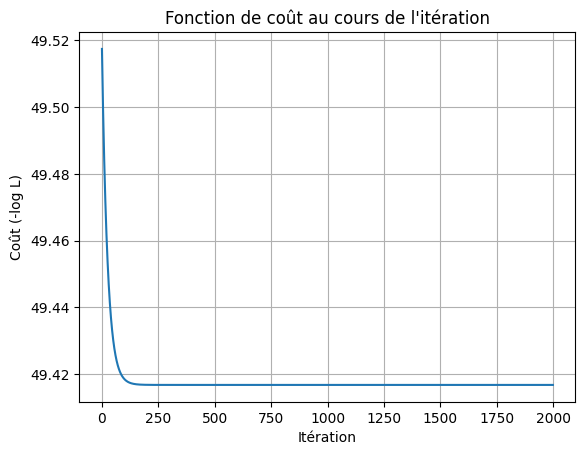

Valeur optimale de p: 0.4000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données
A = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]])  # Matrice d'adjacence
m = np.sum(A) / 2  # Nombre total d'arêtes
C = np.array([0, 0, 1])  # Communautés associées à chaque nœud (exemple)

# Fonction pour calculer la log-vraisemblance
def log_likelihood(p, A, m, C):
    logL = 0
    n = A.shape[0]
    degrees = np.sum(A, axis=1)  # Calcul des degrés des nœuds

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                logL += A[i, j] * np.log(p) + (1 - A[i, j]) * np.log(1 - p)
            else:
                prob = 2 * m / (degrees[i] * degrees[j]) if degrees[i] > 0 and degrees[j] > 0 else 0
                prob = np.clip(prob, 1e-10, 1 - 1e-10)  # Pour éviter des valeurs extrêmes
                logL += A[i, j] * np.log(prob) + (1 - A[i, j]) * np.log(1 - prob)

    return logL

# Fonction pour calculer la négation de la log-vraisemblance
def negative_log_likelihood(p, A, m, C):
    return -log_likelihood(p, A, m, C)

# Fonction pour calculer la dérivée de la négative log-vraisemblance par rapport à p
def gradient_negative_log_likelihood(p, A, C):
    grad = 0
    n = A.shape[0]
    degrees = np.sum(A, axis=1)  # Calcul des degrés des nœuds

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                grad += -(A[i, j] / p) + ((1 - A[i, j]) / (1 - p))

    return grad

# Descente de gradient avec enregistrement de la fonction de coût
def gradient_descent(A, m, C, p_init=0.5, learning_rate=0.001, max_iter=2000):
    p = p_init
    cost_history = []  # Liste pour enregistrer l'historique de la fonction de coût

    for _ in range(max_iter):
        cost = negative_log_likelihood(p, A, m, C)  # Calculer le coût actuel
        cost_history.append(cost)  # Enregistrer le coût
        grad = gradient_negative_log_likelihood(p, A, C)

        if np.isnan(grad) or np.isinf(grad):
            print(f"Gradient invalide à l'itération {_}: {grad}")
            break

        p -= learning_rate * grad  # Mise à jour du paramètre p

        # Pour éviter que p soit hors des limites [0, 1]
        p = np.clip(p, 1e-10, 1 - 1e-10)

    return p, cost_history

# Exécution de la descente de gradient
optimal_p, cost_history = gradient_descent(A, m, C)

# Tracer la fonction de coût
plt.plot(cost_history)
plt.title("Fonction de coût au cours de l'itération")
plt.xlabel("Itération")
plt.ylabel("Coût (-log L)")
plt.grid()
plt.show()

print(f"Valeur optimale de p: {optimal_p:.4f}")


In [ ]:
import numpy as np

# Fonction pour calculer la modularité
def modularity(adj_matrix, communities, m):
    Q = 0
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if communities[i] == communities[j]:  # Si i et j appartiennent à la même communauté
                Q += adj_matrix[i][j] - (np.sum(adj_matrix[i]) * np.sum(adj_matrix[j]) / (2 * m))
    return Q / (2 * m)

# Fonction pour calculer la variation de modularité lors du changement de communauté
def delta_modularity(adj_matrix, node, current_community, new_community, communities, m):
    P_in = np.sum(adj_matrix[communities == new_community][:, communities == new_community])  # Somme des poids dans la nouvelle communauté
    P_tot = np.sum(adj_matrix[node])  # Degré du nœud
    k_in = np.sum(adj_matrix[node, communities == new_community])  # Somme des poids vers la nouvelle communauté

    delta_Q = ((P_in + k_in) / (2 * m) - (P_tot + np.sum(adj_matrix[node])) / (2 * m)) ** 2 - \
               (P_in / (2 * m) - (P_tot / (2 * m)) ** 2 - (P_tot / (2 * m))) ** 2
    return delta_Q

# Algorithme de Louvain
def louvain(adj_matrix):
    n = len(adj_matrix)
    m = np.sum(adj_matrix) / 2  # Nombre total d'arêtes
    communities = np.arange(n)  # Initialisation, chaque nœud dans sa propre communauté

    epsilon = 0.001  # Valeur initiale de la modularité
    Q = -1  # Initialiser Q à une valeur inférieure à 0 pour entrer dans la boucle
    while abs(Q) > epsilon:
        for node in range(n):
            current_community = communities[node]

            for neighbor in np.unique(communities[adj_matrix[node] > 0]):
                if neighbor != current_community:
                    # Calculer la variation de modularité si le nœud est déplacé vers la communauté "neighbor"
                    delta_Q = delta_modularity(adj_matrix, node, current_community, neighbor, communities, m)

                    # Si la variation de modularité est positive, déplacer le nœud vers cette nouvelle communauté
                    if delta_Q > 0:
                        communities[node] = neighbor

        # Phase 2 : Agrégation
        new_adj_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if communities[i] == communities[j]:
                    new_adj_matrix[i][j] = adj_matrix[i][j]

        # Répéter jusqu'à ce que la modularité ne puisse plus être améliorée
        final_modularity = modularity(new_adj_matrix, communities, m)
        Q = final_modularity

    return communities, final_modularity

# Exemple d'utilisation avec une matrice d'adjacence
if __name__ == "__main__":
    # Matrice d'adjacence plus grande avec 10 nœuds
    A = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
                  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
                  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
                  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
                  [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
                  [0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

    communities, final_modularity = louvain(A)
    print("Communautés finales : ", communities)
    print("Modularité finale : ", final_modularity)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer la modularité
def modularity(adj_matrix, communities, m):
    Q = 0
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if communities[i] == communities[j]:  # Si i et j appartiennent à la même communauté
                Q += adj_matrix[i][j] - (np.sum(adj_matrix[i]) * np.sum(adj_matrix[j]) / (2 * m))
    return Q / (2 * m)

# Fonction pour calculer la variation de modularité lors du changement de communauté
def delta_modularity(adj_matrix, node, current_community, new_community, communities, m):
    P_in = np.sum(adj_matrix[communities == new_community][:, communities == new_community])  # Somme des poids dans la nouvelle communauté
    P_tot = np.sum(adj_matrix[node])  # Degré du nœud
    k_in = np.sum(adj_matrix[node, communities == new_community])  # Somme des poids vers la nouvelle communauté

    # Calcul de la variation de modularité
    delta_Q = (P_in + k_in) / (2 * m) - (P_tot / (2 * m)) ** 2
    return delta_Q
import numpy as np
from tqdm import tqdm  # Assurez-vous d'importer tqdm

# Exemple de fonction pour calculer la modularité (à définir)
def modularity(adj_matrix, communities, m):
    # Implémentez la logique pour calculer la modularité ici
    pass

# Exemple de fonction pour calculer la variation de modularité (à définir)
def delta_modularity(adj_matrix, node, current_community, neighbor, communities, m):
    # Implémentez la logique pour calculer la variation de modularité ici
    pass

# Algorithme de Louvain
def louvain(adj_matrix):
    n = len(adj_matrix)
    m = np.sum(adj_matrix) / 2  # Nombre total d'arêtes
    communities = np.arange(n)  # Initialisation, chaque nœud dans sa propre communauté

    Q = modularity(adj_matrix, communities, m)  # Initialiser Q
    i = 0

    # Utiliser tqdm pour la barre de progression
    with tqdm(total=12, desc='Iterations', unit='iteration') as pbar:
        while i < 12:
            improvement = False  # Indiquer si une amélioration a été faite

            for node in range(n):
                current_community = communities[node]

                for neighbor in np.unique(communities[adj_matrix[node] > 0]):
                    if neighbor != current_community:
                        # Calculer la variation de modularité si le nœud est déplacé vers la communauté "neighbor"
                        delta_Q = delta_modularity(adj_matrix, node, current_community, neighbor, communities, m)

                        # Si la variation de modularité est positive, déplacer le nœud vers cette nouvelle communauté
                        if delta_Q > 0:
                            communities[node] = neighbor
                            improvement = True  # Indiquer qu'une amélioration a été faite

            # Phase 2 : Agrégation
            new_adj_matrix = np.zeros((n, n))
            for i in range(n):
                for j in range(n):
                    if communities[i] == communities[j]:
                        new_adj_matrix[i][j] = adj_matrix[i][j]

            # Calculer la nouvelle modularité
            new_modularity = modularity(new_adj_matrix, communities, m)

            Q = new_modularity  # Mettre à jour Q avec la nouvelle modularité

            if improvement:
                pbar.update(1)  # Mettre à jour la barre de progression si une amélioration a eu lieu

            i += 1  # Incrémenter le compteur d'itérations

    return communities, Q


# Fonction pour calculer la log-vraisemblance
def log_likelihood(p, A, m, C):
    logL = 0
    n = A.shape[0]
    degrees = np.sum(A, axis=1)  # Calcul des degrés des nœuds

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                logL += A[i, j] * np.log(p) + (1 - A[i, j]) * np.log(1 - p)
            else:
                prob = 2 * m / (degrees[i] * degrees[j]) if degrees[i] > 0 and degrees[j] > 0 else 0
                prob = np.clip(prob, 1e-10, 1 - 1e-10)  # Pour éviter des valeurs extrêmes
                logL += A[i, j] * np.log(prob) + (1 - A[i, j]) * np.log(1 - prob)

    return logL

# Fonction pour calculer la négation de la log-vraisemblance
def negative_log_likelihood(p, A, m, C):
    return -log_likelihood(p, A, m, C)

# Fonction pour calculer la dérivée de la négative log-vraisemblance par rapport à p
def gradient_negative_log_likelihood(p, A, C):
    grad = 0
    n = A.shape[0]
    degrees = np.sum(A, axis=1)  # Calcul des degrés des nœuds

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                grad += -(A[i, j] / p) + ((1 - A[i, j]) / (1 - p))

    return grad

# Descente de gradient avec enregistrement de la fonction de coût
def gradient_descent(A, m, C, p_init=0.5, learning_rate=0.001, max_iter=2000):
    p = p_init
    cost_history = []  # Liste pour enregistrer l'historique de la fonction de coût

    for _ in range(max_iter):
        cost = negative_log_likelihood(p, A, m, C)  # Calculer le coût actuel
        cost_history.append(cost)  # Enregistrer le coût
        grad = gradient_negative_log_likelihood(p, A, C)

        if np.isnan(grad) or np.isinf(grad):
            print(f"Gradient invalide à l'itération {_}: {grad}")
            break

        p -= learning_rate * grad  # Mise à jour du paramètre p

        # Pour éviter que p soit hors des limites [0, 1]
        p = np.clip(p, 1e-10, 1 - 1e-10)

    return p, cost_history

# Exemple d'utilisation avec une matrice d'adjacence
if __name__ == "__main__":
    # Matrice d'adjacence plus grande avec 10 nœuds
    A = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
                  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
                  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
                  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
                  [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
                  [0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

    # Calcule
#m = np.sum(A) / 2

# Initialiser les communautés
#C = np.arange(len(A))  # Chaque nœud dans sa propre communauté

# Calculer le seuil en utilisant la descente de gradient
#optimal_p, cost_history = gradient_descent(A, m, C)

# Exécuter l'algorithme de Louvain
communities, final_modularity = louvain(A)

print("Communautés finales : ", communities)
print("Modularité finale : ", final_modularity)









KeyboardInterrupt: 

In [ ]:
pip install tqdm


In [ ]:
!pip install cairocffi


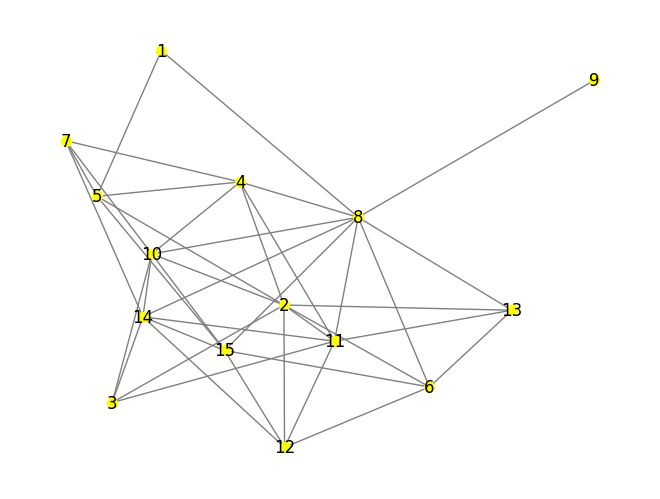

In [ ]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
taille=100
link= 500
# Créez votre graphe igraph
g = ig.Graph.Erdos_Renyi(n=taille, m=link)

# Convertissez en NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Dessinez le graphe avec NetworkX et Matplotlib
pos = nx.spring_layout(G_nx)  # Utilise l'algorithme de Fruchterman-Reingold
nx.draw(G_nx, pos, with_labels=False, node_size=50, node_color="yellow", edge_color="gray")

# Numérotez les nœuds de 1 à 15
labels = {i: str(i + 1) for i in range(15)}  # Crée un dictionnaire pour les étiquettes
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Affichez le graphe
plt.show()


ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 633.

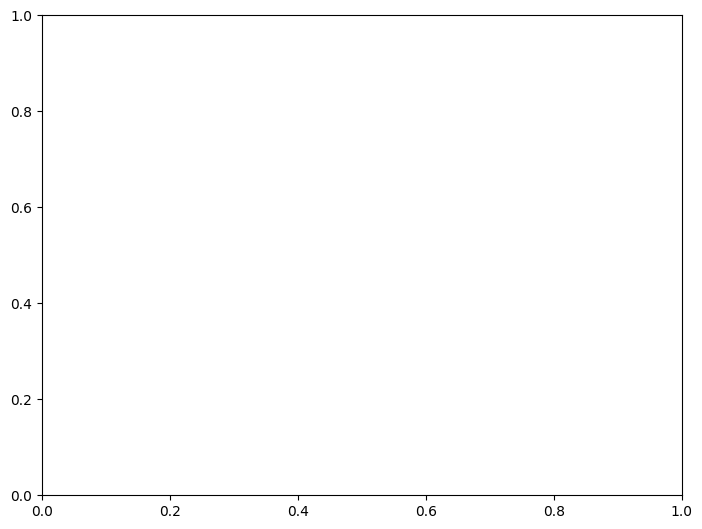

In [98]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt

# Définir la taille et le nombre de liens
taille = 1000
link = 500

# Créez votre graphe igraph
g = ig.Graph.Erdos_Renyi(n=taille, m=link)

# Convertissez en NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Appliquer l'algorithme de Louvain pour détecter les communautés
partition = nx.algorithms.community.louvain_communities(G_nx)

# Créer un dictionnaire pour mapper chaque nœud à sa communauté
node_community = {}
for community_id, community in enumerate(partition):
    for node in community:
        node_community[node] = community_id

# Créer une liste de couleurs pour les nœuds
#colors = [node_community[i] for i in range(taille)]  # Utilise l'ID de communauté comme couleur

# Dessinez le graphe avec NetworkX et Matplotlib
pos = nx.spring_layout(G_nx)  # Utilise l'algorithme de Fruchterman-Reingold
nx.draw(G_nx, pos, node_size=50, node_color=colors, edge_color="gray", cmap=plt.cm.Set3)

# Numérotez les nœuds de 1 à taille
labels = {i: str(i + 1) for i in range(taille)}  # Crée un dictionnaire pour les étiquettes
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Affichez le graphe
plt.show()

# Afficher les communautés obtenues
for i, community in enumerate(partition):
    print(f"Communauté {i + 1}: {community}")


In [ ]:
adjacency_matrix_ig = g.get_adjacency()
print(adjacency_matrix_ig)


In [ ]:
import pandas as pd
df = pd.DataFrame(adjacency_matrix_ig, columns=[f'C{i+1}' for i in range(15)], index=[f'C{i+1}' for i in range(15)])

# Afficher le DataFrame
print(df)

     C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12  C13  C14  C15
C1    0   0   1   0   0   0   0   0   1    0    0    0    0    0    1
C2    0   0   0   0   0   0   0   0   0    0    0    1    0    0    0
C3    1   0   0   1   0   0   0   1   0    1    1    0    0    0    0
C4    0   0   1   0   1   0   1   0   1    1    0    1    1    1    1
C5    0   0   0   1   0   0   1   0   0    1    1    0    0    0    1
C6    0   0   0   0   0   0   1   1   0    1    0    1    0    0    1
C7    0   0   0   1   1   1   0   0   1    0    1    0    1    1    0
C8    0   0   1   0   0   1   0   0   1    0    0    1    1    0    0
C9    1   0   0   1   0   0   1   1   0    0    0    0    1    1    0
C10   0   0   1   1   1   1   0   0   0    0    1    0    0    0    1
C11   0   0   1   0   1   0   1   0   0    1    0    0    0    1    0
C12   0   1   0   1   0   1   0   1   0    0    0    0    0    1    0
C13   0   0   0   1   0   0   1   1   1    0    0    0    0    1    0
C14   0   0   0   1 

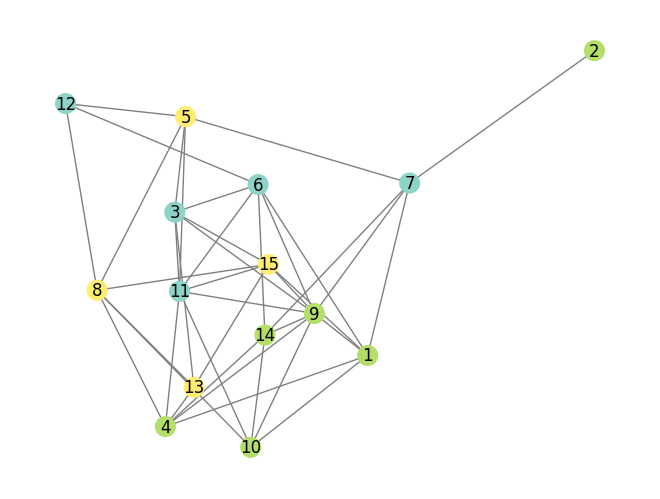

Communauté 1: {2, 4, 5, 10, 11}
Communauté 2: {0, 1, 6, 8, 9, 13}
Communauté 3: {3, 12, 14, 7}


In [ ]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt

# Créez votre graphe igraph
g = ig.Graph.Erdos_Renyi(n=15, m=40)

# Convertissez en NetworkX
G_nx = nx.Graph(g.get_edgelist())

# Appliquer l'algorithme de Louvain pour détecter les communautés
partition = nx.algorithms.community.louvain_communities(G_nx)

# Créer un dictionnaire pour mapper chaque nœud à sa communauté
node_community = {}
for community_id, community in enumerate(partition):
    for node in community:
        node_community[node] = community_id

# Créer une liste de couleurs pour les nœuds
colors = [node_community[i] for i in range(15)]  # Utilise l'ID de communauté comme couleur

# Dessinez le graphe avec NetworkX et Matplotlib
pos = nx.spring_layout(G_nx)  # Utilise l'algorithme de Fruchterman-Reingold
nx.draw(G_nx, pos, node_size=200, node_color=colors, edge_color="gray", cmap=plt.cm.Set3)

# Numérotez les nœuds de 1 à 15
labels = {i: str(i + 1) for i in range(15)}  # Crée un dictionnaire pour les étiquettes
nx.draw_networkx_labels(G_nx, pos, labels=labels)

# Affichez le graphe
plt.show()

# Afficher les communautés obtenues
for i, community in enumerate(partition):
    print(f"Communauté {i + 1}: {community}")


In [ ]:
!pip install python-louvain
